## Аналитика в Яндекс.Афише

### Шаг 1. Ознакомление с данными и подготовка к анализу

In [1]:
import pandas as pd #библиотека pandas
from matplotlib import pyplot as plt #библиотека matplotlib для работы с графиками
import seaborn as sns #библиотека seaborn для расширенной работы с графиками
import numpy as np #библиотека numpy для работы с математическими операциями

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv') #датасет для данных о посетителях

In [3]:
orders = pd.read_csv('/datasets/orders_log.csv') #датасет для данных о заказах

In [4]:
costs = pd.read_csv('/datasets/costs.csv') #датасет с данным о затратах на маркетинг

In [5]:
visits.info() #первичное представление о данных
visits.head(10) #первые 10 строк датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [6]:
orders.info() #первичное представление о данных
orders.head(10) #первые 10 строк датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [7]:
costs.info() #первичное представление о данных
costs.head(10) #первые 10 строк датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [8]:
#проверим каждый столбец датасета visits на наличие и количество уникальных значений
print(len(visits['Device'].unique()))
print(len(visits['End Ts'].unique()))
print(len(visits['Source Id'].unique()))
print(len(visits['Start Ts'].unique()))
print(len(visits['Uid'].unique()))

2
224760
9
224303
228169


In [9]:
#проверим каждый столбец датасета orders на наличие и количество уникальных значений
print(len(orders['Buy Ts'].unique()))
print(len(orders['Revenue'].unique()))
print(len(orders['Uid'].unique()))

45991
1149
36523


In [10]:
#проверим каждый столбец датасета costs на наличие и количество уникальных значений
print(len(costs['source_id'].unique()))
print(len(costs['dt'].unique()))
print(len(costs['costs'].unique()))

7
364
2396


In [11]:
#проверяю количество пропущенных значений во всех датасета
visits.isna().sum()
orders.isna().sum()
costs.isna().sum()
#пропущенных значений нет

source_id    0
dt           0
costs        0
dtype: int64

In [12]:
#проверим датасет visits на наличие дубликатов
visits.duplicated().sum()

0

In [13]:
#проверим датасет orders на наличие дубликатов
orders.duplicated().sum()

0

In [14]:
#проверим датасет costs на наличие дубликатов
costs.duplicated().sum()

0

### Предобработка данных


In [15]:
#наименования столбцов visits и orders приведем к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [16]:
#изменим названия столбцов в датасете visits и orders
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

In [17]:
#тип данных столбцов 'end_ts' и 'start_ts' датасета visits и столбца 'buy_ts' датасета orders приведем к формату даты

#visits
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")

#orders
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")

### Вывод

##### На этапе предобработки было сделано:
1. Наименования столбцов в датасетах visits и orders приведены к нижнему регистру;
2. Были изменены названия столбцов в датасете visits и orders;
3. Тип данных в столбцах 'end_ts' и 'start_ts' и тип данных в столбце 'buy_ts' в датасетах visits и orders соответствено были приведены к формату даты;

##### По итогу шага выполнены все необходимые преобразования

### Шаг 2. Построение отчетов и подсчет метрик

### Продукт

In [18]:
#для начала в датасете 'visits' создаю столбцы с информацией о дне, неделе, месяце и годе начала сессии
visits['session_week'] = visits['start_ts'].astype('datetime64[W]') #неделя
visits['session_month'] = visits['start_ts'].astype('datetime64[M]') #месяц
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]') #год
visits['session_date'] = visits['start_ts'].astype('datetime64[D]') #полная дата

#первые 10 строк датасета
visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_year,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-01-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-01-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-01-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-01-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-01-01,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-08-31,2017-09-01,2017-01-01,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-25,2018-01-01,2018-01-01,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-02,2017-11-01,2017-01-01,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-13,2017-07-01,2017-01-01,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-02,2017-11-01,2017-01-01,2017-11-08


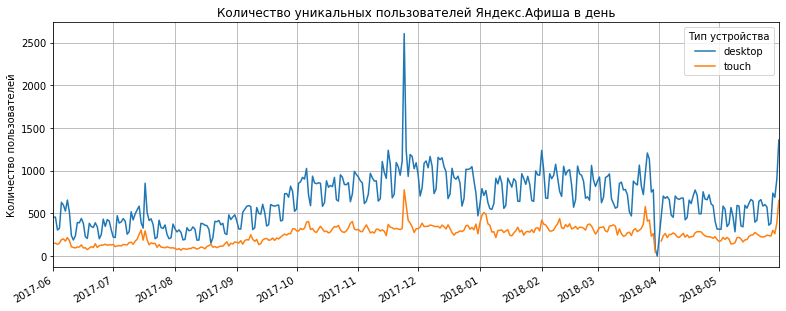

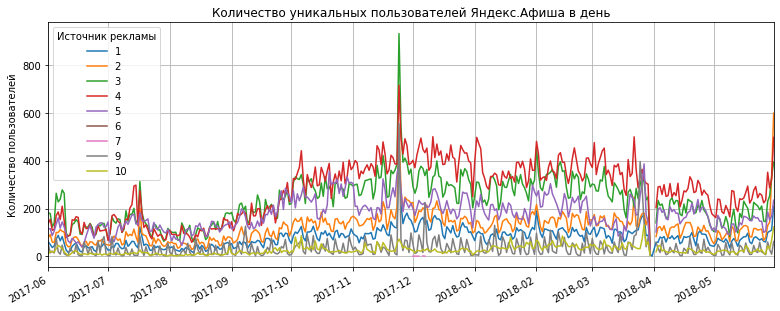

uid    908.0
dtype: float64


In [19]:
#количество уникальных пользователей в день, метрика DAU и графики с разбивкой

#количество уникальных пользователей в день
dau = visits.groupby('session_date').agg({'uid': 'nunique'})

#разбивка dau по типу устройства
dau_device = visits.pivot_table(index='session_date', columns = 'device', values = 'uid', aggfunc = 'nunique')
dau_device.plot(figsize = (13,5), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в день')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Тип устройства')
plt.show()

#разбивка dau по источнику рекламы
dau_source = visits.pivot_table(index='session_date', columns = 'source_id', values = 'uid', aggfunc = 'nunique')
dau_source.plot(figsize = (13,5), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в день')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Источник рекламы')
plt.show()

print(dau.mean().round()) #количество уникальных посетителей за день

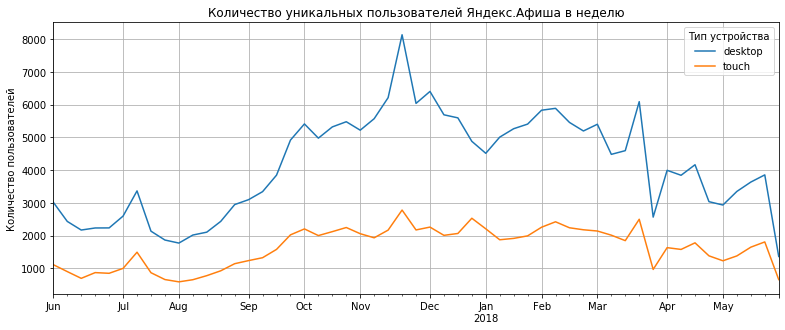

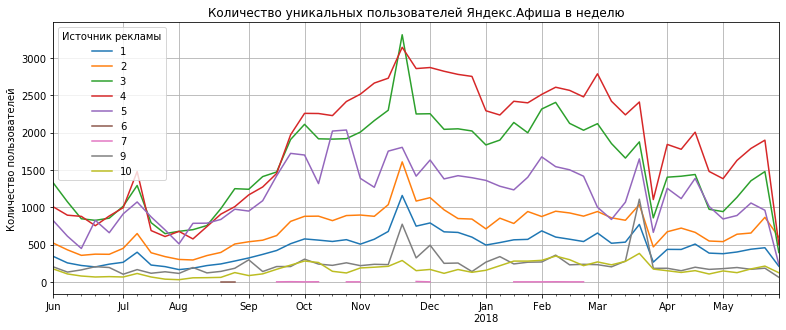

uid    5724.0
dtype: float64


In [20]:
#количество уникальных пользователей в неделю, метрика WAU и график

#количество уникальных пользователей в неделю
wau = visits.groupby('session_week').agg({'uid': 'nunique'})

#разбивка wau по типу устройства
wau_device = visits.pivot_table(index='session_week', columns = 'device', values = 'uid', aggfunc = 'nunique').plot(figsize = (13,5), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в неделю')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Тип устройства')
plt.show()

#разбивка wau по источнику рекламы
wau_source = visits.pivot_table(index='session_week', columns = 'source_id', values = 'uid', aggfunc = 'nunique').plot(figsize = (13,5), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в неделю')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Источник рекламы')
plt.show()

print(wau.mean().round())

##### Вывод по графикам:
1. Количество уникальных пользователей в неделю: 5724 человек;
2. В приципе, активность по типу устройства пользователя не сильно отличается от данных, полученных за день. Декстопной версией все еще пользуются больше;
3. Наиболее больше пики активности у рекламных источников - 3 и 4;
4. Минимум пользователей приносит источник 7, а следом за ним источник 10. 

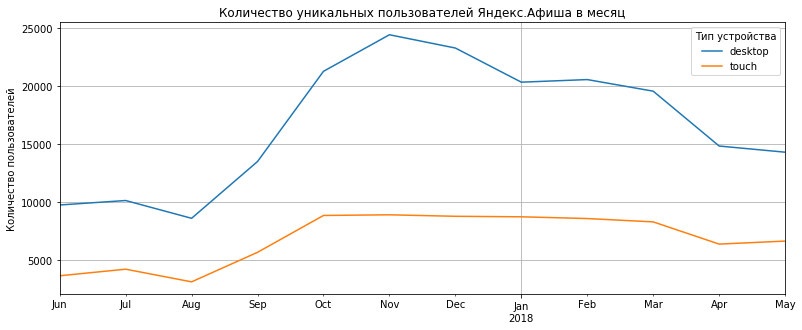

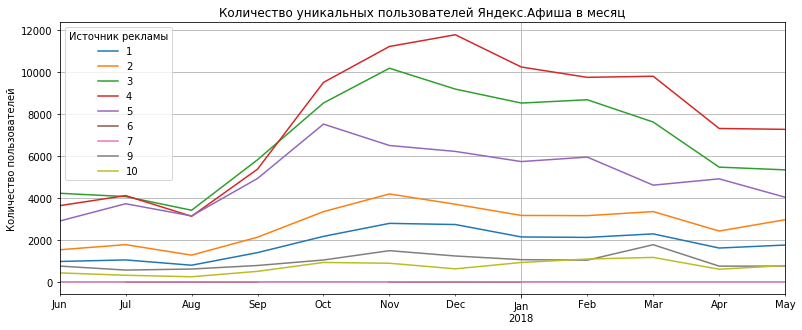

uid    23228.0
dtype: float64


In [21]:
#количество уникальных пользователей в месяц, метрика MAU и график

#количество уникальных пользователей в месяц
mau = visits.groupby('session_month').agg({'uid': 'nunique'})

#mau c разбивкой по типу устройства
mau_device = visits.pivot_table(index='session_month', columns = 'device', values = 'uid', aggfunc = 'nunique').plot(figsize = (13,5), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в месяц')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Тип устройства')
plt.show()

#mau с разбивкой по источнику рекламы
mau_source = visits.pivot_table(index='session_month', columns = 'source_id', values = 'uid', aggfunc = 'nunique').plot(figsize = (13,5), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в месяц')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Источник рекламы')
plt.show()

print(mau.mean().round())

##### Выводы по графику:
1. Количество уникальных пользователей в месяц: 23228;
2. Пользователей декстопной версии больше, чем пользователей мобильного приложения;
3. Самые эффективные источники рекламы - 3 и 4. Самым неэффективным остается источник 7.

Количество сессий в день: uid  count    987.0
dtype: float64


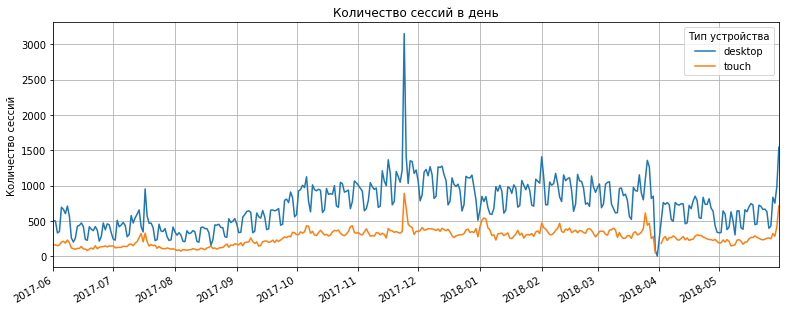

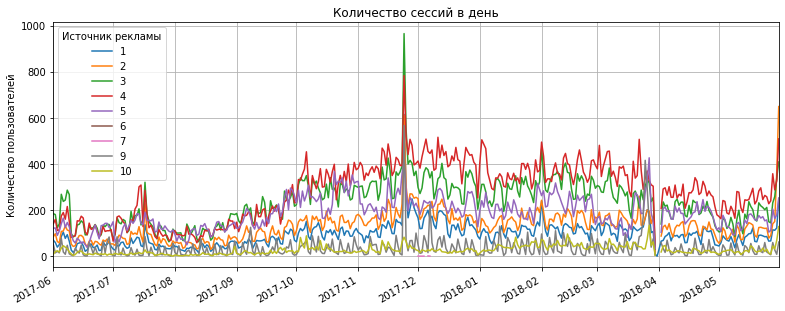

In [22]:
#подсчитаем сколько сессий совершается в день с разбивкой по типу устройства и источнику рекламу

#количество сессий в день
sessions_per_day = visits.groupby(['session_date']).agg({'uid': ['count']})
print('Количество сессий в день:', sessions_per_day.mean().round())

#разбивка по типу устройства
sessions_per_day_device = visits.pivot_table(index='session_date', columns = 'device', values = 'uid', aggfunc = 'count').plot(figsize = (13,5), grid = True)
plt.title('Количество сессий в день')
plt.xlabel('')
plt.ylabel('Количество сессий')
plt.legend(title = 'Тип устройства')
plt.show()

#разбивка по источнику рекламы
sessions_per_day_source = visits.pivot_table(index='session_date', columns = 'source_id', values = 'uid', aggfunc = 'count').plot(figsize = (13,5), grid = True)
plt.title('Количество сессий в день')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Источник рекламы')
plt.show()

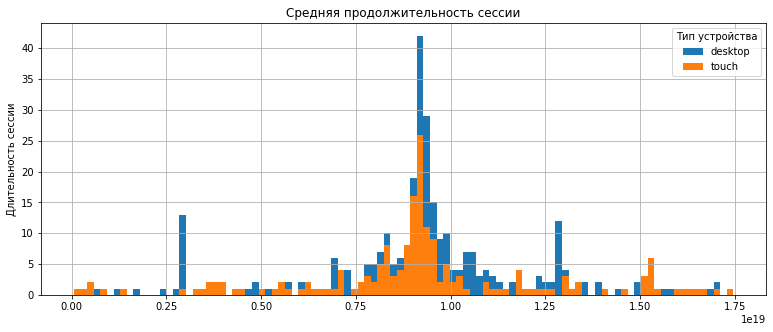

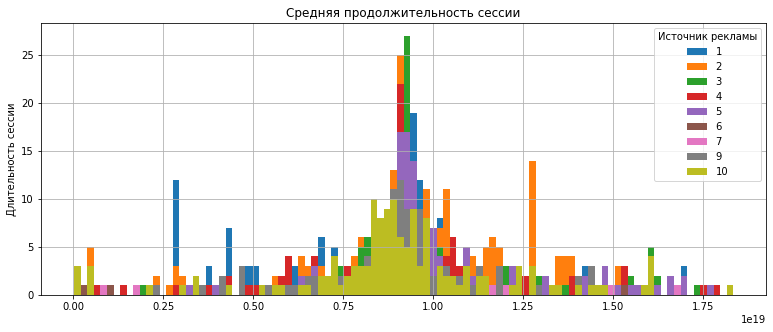

Самая частая длительность сессии составляет 60 секунд


In [23]:
#узнаем среднюю продолжительность одной сессии или метрику ASL
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']) / np.timedelta64(1,'s')

#средняя продолжительность сессии с разбикой по типу устройства
sessions_duration_sec_device = visits.pivot_table(index='session_duration_sec', columns = 'device', values = 'uid', aggfunc = 'mean').plot(kind='hist', bins = 100, figsize = (13,5), grid = True)
plt.title('Средняя продолжительность сессии')
plt.xlabel('')
plt.ylabel('Длительность сессии')
plt.legend(title = 'Тип устройства')
plt.show()

#средняя продолжительность сессии с разбивкой по источнику рекламы
sessions_deuration_sec_source = visits.pivot_table(index='session_duration_sec', columns = 'source_id', values = 'uid', aggfunc = 'mean').plot(kind='hist', bins = 100, figsize = (13,5), grid = True)
plt.title('Средняя продолжительность сессии')
plt.xlabel('')
plt.ylabel('Длительность сессии')
plt.legend(title = 'Источник рекламы')
plt.show()

print('Самая частая длительность сессии составляет {:.0f} секунд'.format(visits['session_duration_sec'].mode()[0]))

In [24]:
#определим, когда пользователь впервые воспользовался сервисом
first_visits_customer = visits.groupby(['uid'])['start_ts'].min()
first_visits_customer.name = 'first_visit'
visits = visits.join(first_visits_customer, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_year,session_date,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-01-01,2017-12-20,1080.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-01-01,2018-02-19,1680.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-01-01,2017-07-01,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-01-01,2018-05-20,1440.0,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-01-01,2017-12-27,0.0,2017-12-27 14:06:00


Коэффициент удержания:  0.19


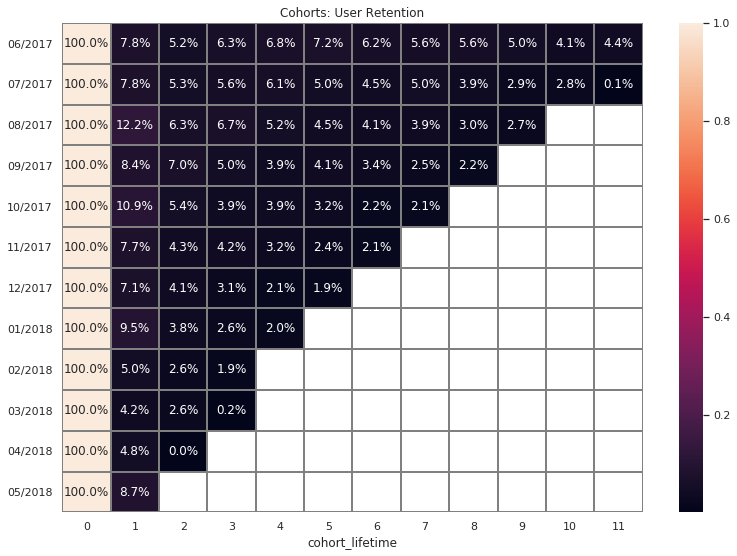

In [25]:
#определим, как часто люди возвращаются в приложение, метрика Retention Rate
#нужно сформировать когорты по месяцам и в дальнейшем подсчитать метрику RR

#сформируем когорты по месяцам
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['session_date'].astype('datetime64[M]')

#рассчитаем lifetime пользователей
visits['cohort_lifetime'] = visits['start_ts'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

#подсчитаем для каждой когорты количество уникальных пользователей на каждый месяц
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

#найдем исходное количество пользователей на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]

#переименуем столбец
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

#объединение данных по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')

#рассчет RR
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

#сводная таблица для построения тепловой карты
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime', values='retention',aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

#тепловая карта
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
print('Коэффициент удержания: ', '{:.2f}'.format(cohorts['retention'].mean()))

### Вывод по расчетам продукта

##### Что было сделано:
1. В датасете visits созданы столбцы 'session_date', 'session_week', 'session_month', 'session_year' с информацией о дате, неделе, месяце и годе сессии;
2. Были рассчитаны метрики DAU, WAU И MAU с разбивкой по типу устройства и источнику рекламы;
3. Подсчитано суммарное количество сессий в день с разбивкой по типу устройства и источнику рекламы;
4. Подсчитана метрика ASL с разбивкой по типу устройства и источнику рекламы;
5. Определено время начала активности каждого пользователя;
6. Рассчитана метрика Retention Rate и построена тепловая карта.
7. Написан вывод к каждому графику.

##### Полученные показатели:

##### DAU - 908, WAU - 5724, MAU - 23228, Среднее количество сессий в день - 987, ASL - 60 секунд, RR - 0,19.

##### Общие выводы по расчетам:
1. Пользователей декстопной версии больше, чем пользователей мобильной;
2. Наиболее эффективными рекламными источниками являются 3 и 4.
3. Наименне эффективный рекламный источник - 7, 10 и 9.
4. Пик активность приходится на новогодние праздники, что вполне объяснимо.
5. Основая масса сессий сосредточена от октября до апреля, что объясняется повышением спроса на мероприятия, билеты на которые можно купить с помощью сервиса, из-за сезонности, погодных условий (из-за которых не хочется выходить на улицу лишний раз), а также сменой репетуара в театрах, количество концертов и т.д;  
6. Выводы по LTV сообщают о том, что с проектом что-то не так, потому что с каждым месяцем когорты пользователей становится все меньше и меньше. 

##### По итогу этапа выполнены все необходимые вычисления и написаны выводы.

### Продажи

In [26]:
#для начала в датасете orders создаю столбец с информацией о времени покупки
orders['buy_date'] = orders['buy_ts'].astype('datetime64[D]') #полная дата

In [27]:
#найдем время первой покупки
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase']

#когда люди начинают покупать
time_to_order = visits.merge(first_purchase, on = 'uid')
time_to_order['time_to_first_purchase'] = pd.to_timedelta((time_to_order['first_purchase'] - time_to_order['first_visit']).\
                                                          dt.days, unit='d') / np.timedelta64(1,'D')
print('С момента посещения сайта до первой покупки проходит:', time_to_order['time_to_first_purchase'].mode())

С момента посещения сайта до первой покупки проходит: 0    0.0
dtype: float64


Среднее количество покупок за все периоды:  0.23


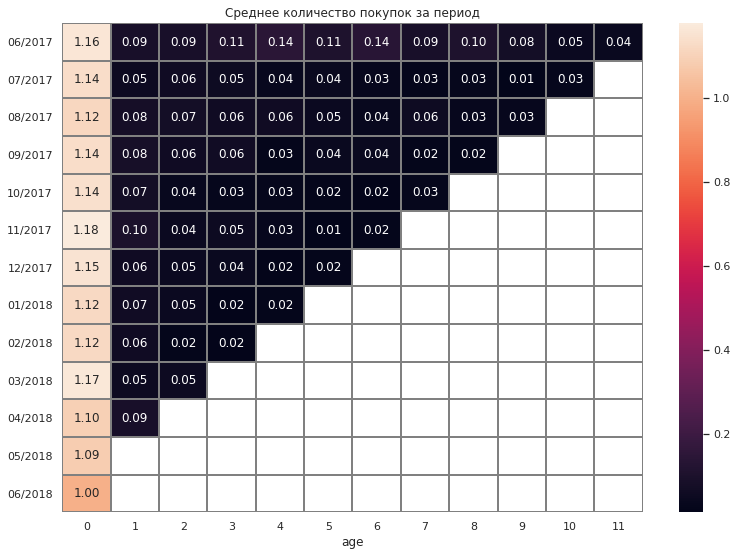

In [28]:
#определим, сколько покупок совершают пользователи за период

#сфомируем когорту по месяцу
orders['order_month'] = orders['buy_date'].astype('datetime64[M]')

#найдем месяц первой покупки пользователя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

#количество покупателей за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

#месяц первой покупки каждого пользователя добавим в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')

#подсчитаем количество заказов
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'buy_ts': 'count', 'revenue' : 'sum'}).reset_index()

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

#найдем возраст когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#найдем количество покупок
report['rate'] = report['buy_ts'] / report['n_buyers']

#сводная таблица
report_pivot = report.pivot_table(index='first_order_month',
                                columns='age',
                                values='rate',
                                aggfunc='mean')
report_pivot.index = report_pivot.index.strftime("%m/%Y")

#тепловая карта
plt.figure(figsize=(13, 9))
plt.title('Среднее количество покупок за период')
plt.xlabel('Месяц заказа')
plt.ylabel('Первый месяц заказа')
sns.heatmap(report_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
print('Среднее количество покупок за все периоды: ', '{:.2f}'.format(report['rate'].mean()))

In [29]:
#найдем средний чек
average_check = orders_new.groupby('order_month').agg({'buy_ts' : 'count', 'revenue' : 'sum'})
average_check['mean'] = average_check['revenue'] / average_check['buy_ts']
print('Средний чек:', '{:.2f}$'.format(average_check['mean'].sum()))

Средний чек: 62.90$


LTV: 1.1$


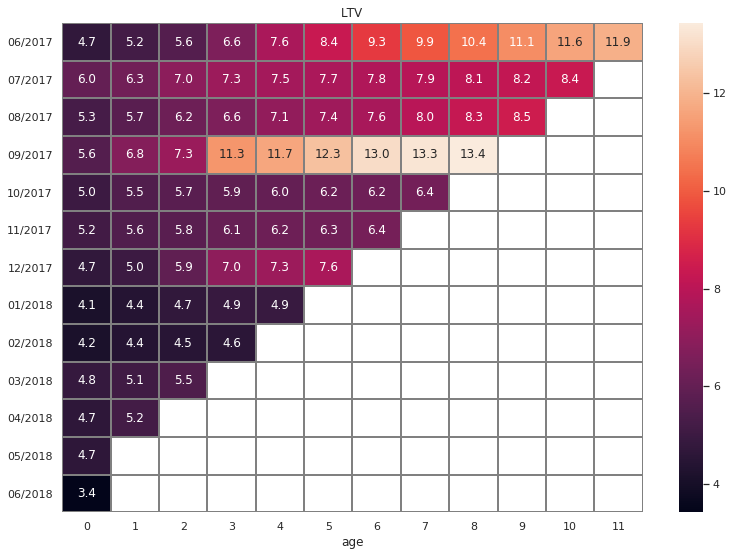

In [30]:
#рассчитаем LTV

#сформируем когорту по месяцам
costs['month'] = costs['dt'].astype('datetime64[M]')

#маржинальность
margin_rate = 1

#рассчитаем валовую прибыль
report['gp'] = report['revenue'] * margin_rate

#LTV
report['ltv'] = report['gp'] / report['n_buyers']

#сводная таблица LTV
output_ltv = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
output_ltv.index = output_ltv.index.strftime("%m/%Y")

#тепловая карта
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output_ltv.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')
print('LTV:', '{:.1f}$'.format(report['ltv'].mean()))

### Выводы по расчетам продаж:

##### Что было сделано:
1. В датасете orders создан столбец с информацией о времени покупки;
2. Определено время первой покупки пользователя, а также, сколько проходит времени с момента начала сессии до акта покупки;
3. Определено, сколько покупок совершают пользователи за каждый период и подсчитано количество покупок за весь период; построена тепловая карта;
4. Получен показатель среднего чека;
5. Рассчитано LTV и построена тепловая карта;
6. К каждому графику написан вывод.

##### Полученные показатели:

##### Когда люди начинают покупать - 0 дней; количество покупок за весь период - 0.23, средний чек за все время 62.90 , LTV - 1.1.

##### Общие выводы по графикам:
1. Исходя из результатов покупок можно заключить, что пользователи совершают крайне мало покупок или не покупают практически ничего. Кроме того, с каждым периодом покупок становится все меньше и все;
2. LTV растет с каждым периодом, значит, какие-никакие деньги пользователи все же приносят;
3. Активнее всего в первый месяц покупают пользователи когорты от 11.2017 и от 03.2018, что может быть обусловлено приближающимися праздниками, обилием интересных мероприятий, доступных на сервисе, а также общей особенностью этих двух месяцев.

##### По итогу этапа выполнены все необходимые вычисления и написаны выводы.

### Маркетинг

In [31]:
#все расходы на рекламу
print('Сумма всех расходов на рекламу составляет: ', '{:.2f}$'.format(costs['costs'].mean()))

Сумма всех расходов на рекламу составляет:  129.48$


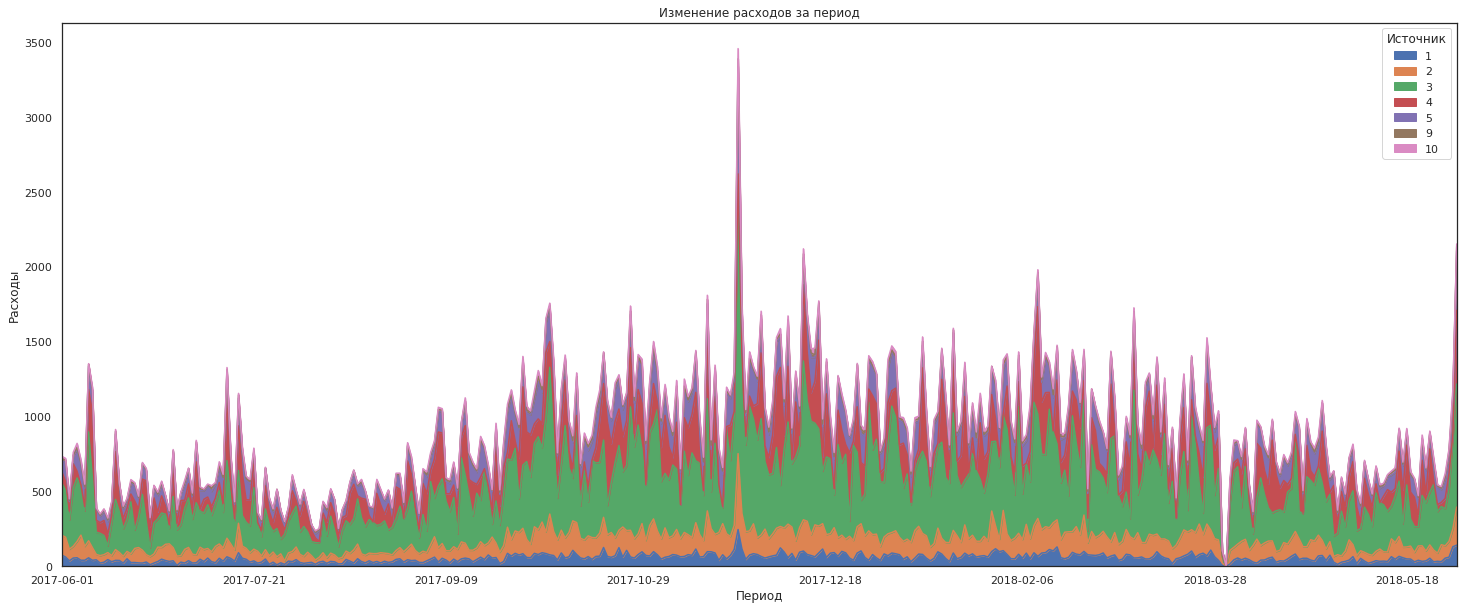

In [32]:
#сводная таблица для построения графика с разбивкой по источникам
costs.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum').plot(kind= 'area', figsize = (25,10))
plt.title('Изменение расходов за период')
plt.xlabel('Период')
plt.ylabel('Расходы')
plt.legend(title = 'Источник')
plt.show()

##### Вывод по графику:
1. Больше всего расходуется средств на истоник 10 и на источник 3, меньше всего на первый и второй источники. Нет данных по тратам на источники 6, 7, 8. Означает ли это то, что на них вовсе не тратятся средства?
2. Пик расходов на источники рекламы приходится на 11.2017, что вполне обусловлено приближающимися новогодники праздниками.

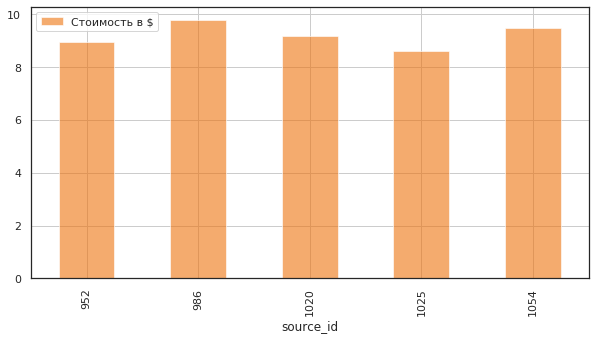

Среднее значение показателя "cac" составляет 9.20$


In [33]:
#найдем CAC

#рассчитаем расходы за месяц
monthly_costs = costs.groupby('month').sum()

#добавим данные о расходам в отчет и посчитаем CAC
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

#среднее cac для каждого покупателя c разбивкой по источнику
cac_source_id = report_new.groupby('source_id').agg({'cac':'mean'}).reset_index()

#график
cac_source_id.plot(kind='bar', figsize=(10, 5), grid=True, color='#ed730e', alpha=0.6, y='cac', x='source_id', label ='Стоимость в $')
plt.show()

print('Среднее значение показателя "cac" составляет', '{:.2f}$'.format(cac_source_id['cac'].mean()))

ROMI: 0.12240251748657069


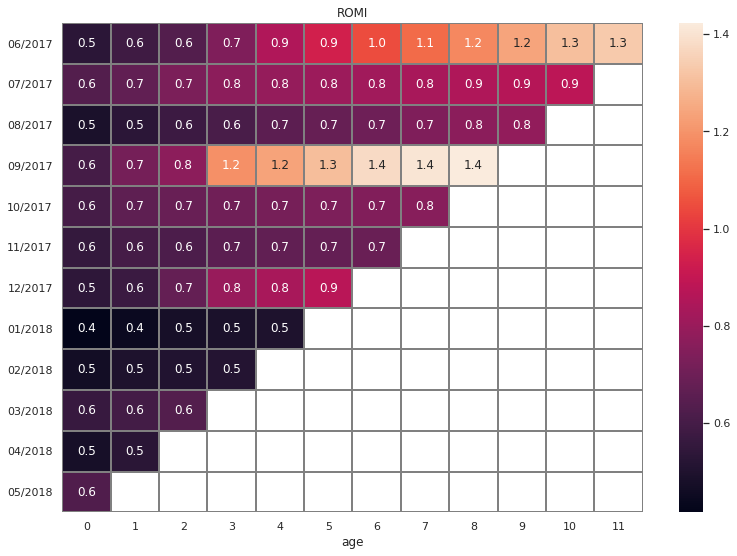

In [34]:
#рассчитаем ROMI
report_new['romi'] = report_new['ltv'] / report_new['cac']

output_romi = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
output_romi.index = output_romi.index.strftime("%m/%Y")

#тепловая карта
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(output_romi.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

#прочитаем отчет
output_romi.cumsum(axis=1).mean(axis=0)

print('ROMI:', report_new['romi'].mean())

### Общие выводы по маркетингу:

##### Что было сделано:
1. Подсчитаны суммарные расходы на маркетинг;
2. Построен график по расходам на маркетинг с разбивкой по источникам;
3. Подсчитан CAC и построен график;
4. Подсчитан ROMI и построен график;
5. Написаны выводы к каждому графику. 

##### Полученные показатели:

##### Суммарные средние расходы на маркетинг - 129.48$, CAC - 9.20$, ROMI - 0.12.

##### По итогу этапа выполнены все необходимые результаты и подсчитаны выводы.

### Шаг 3. Общий вывод и рекомендации.

#####  Количество уникальных значений для visits - 677 243.

##### Количество уникальных значений для orders - 83663.

##### Количество уникальных значений для costs - 2767.

##### В день сервисом пользуются - 908 человек;  в неделю - 5724 человека; в месяц - 23228 человек.

##### В день совершается 987 сессий.

##### В среднем сессия длится 60 секунд.

##### Return Retention - 0.19%.

##### Как правило, пользователи покупают в тот же день, что и впервые воспользовались сервисом.

##### В среднем за весь период пользователи совершают 0.23 покупок.

##### Средний чек - 62.90 долларов.

#####  LTV - 1.1 долларов.

##### Всего на маркетинг было потрачено  129.48 долларов.

##### Привлечние одного покупателя стоило - 9.20 долларов.

##### ROMI - 0.12. 

### Вывод и рекомендации

По результат анализа можно сделать однозначный вывод, что проект Яндекс.Афиша убыточен и не приносит прибыли. Например, расходы на маркетинг в два раза превышают расходы каждого пользователя. Расходы совершаются на те источники, которые привлекают меньше всего пользователей. Через мобильную версию трафик значительно меньше, чем через декстопную версию, что может говорить о ее недостаточной проработке. Покупают - в буквальном смысле - единицы пользователей, а остальные заходят на сайт и покидают его в через 60 секунд. Общая картина такова, что с сервисом за этот период что-то не так. Как со стороны руководства, так и со стороны подчиненных.

Что тут можно сделать? Необходимо работать над метриками RR, количеством покупок, средним чеком, LTV, CAC и ROMI. Нужно изменить источники маркетинга, так как те, на которые сейчас расходуются средства, совершенно неэффективны и привлекают мало новых пользователей. Нужно отказаться от траты на источники рекламы 1, 7, 9, 10 и выбрать наиболее эффективные, например, источники 3, 4 или 5, или попробовать развить оставшиеся. Нужно проработать мобильную версию ресурса, чтобы она стала более удобна и востребована у пользователей. Скорее всего, с декстопной версией тоже проблемы, раз так много людей ее посещают, но покупают совсем мало.

### По итогу работы произведены все необходимые вычисления и написаны выводы. 